In [1]:
%matplotlib inline
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
from tqdm import tqdm
from utils import RESULTS_ROOT

ORDERED_FOLDERS_EC = [
    "20210916_4microstates_2.0-20.0Hz_EC_subjectwise",
    # "20211018_FTsurrs_4microstates_2.0-20.0Hz_EC_subjectwise",
    # "20211019_AAFTsurrs_4microstates_2.0-20.0Hz_EC_subjectwise",
    # "20211020_IAAFTsurrs_4microstates_2.0-20.0Hz_EC_subjectwise",
    # "20211020_SHUFFLEsurrs_4microstates_2.0-20.0Hz_EC_subjectwise",
    "20211119_FTsurrs_4microstates_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_AAFTsurrs_4microstates_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_IAAFTsurrs_4microstates_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_SHUFFLEsurrs_4microstates_2.0-20.0Hz_EC_seeded_subjectwise",
    "20210917_4PCA_2.0-20.0Hz_EC_subjectwise",
    # "20211020_FTsurrs_4PCA_2.0-20.0Hz_EC_subjectwise",
    # "20211020_AAFTsurrs_4PCA_2.0-20.0Hz_EC_subjectwise",
    # "20211020_IAAFTsurrs_4PCA_2.0-20.0Hz_EC_subjectwise",
    # "20211020_SHUFFLEsurrs_4PCA_2.0-20.0Hz_EC_subjectwise",
    "20211120_FTsurrs_4PCA_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211121_AAFTsurrs_4PCA_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211121_IAAFTsurrs_4PCA_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_SHUFFLEsurrs_4PCA_2.0-20.0Hz_EC_seeded_subjectwise",
    "20210917_4ICA_2.0-20.0Hz_EC_subjectwise",
    # "20211020_FTsurrs_4ICA_2.0-20.0Hz_EC_subjectwise",
    # "20211020_AAFTsurrs_4ICA_2.0-20.0Hz_EC_subjectwise",
    # "20211020_IAAFTsurrs_4ICA_2.0-20.0Hz_EC_subjectwise",
    # "20211020_SHUFFLEsurrs_4ICA_2.0-20.0Hz_EC_subjectwise",
    "20211120_FTsurrs_4ICA_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_AAFTsurrs_4ICA_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_IAAFTsurrs_4ICA_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_SHUFFLEsurrs_4ICA_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211025_4hmm_2.0-20.0Hz_EC_subjectwise",
    # "20211025_FTsurrs_4hmm_2.0-20.0Hz_EC_subjectwise",
    # "20211025_AAFTsurrs_4hmm_2.0-20.0Hz_EC_subjectwise",
    # "20211025_IAAFTsurrs_4hmm_2.0-20.0Hz_EC_subjectwise",
    # "20211025_SHUFFLEsurrs_4hmm_2.0-20.0Hz_EC_subjectwise",
    "20211120_FTsurrs_4hmm_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_AAFTsurrs_4hmm_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_IAAFTsurrs_4hmm_2.0-20.0Hz_EC_seeded_subjectwise",
    "20211120_SHUFFLEsurrs_4hmm_2.0-20.0Hz_EC_seeded_subjectwise",
]

ORDERED_FOLDERS_EO = [
    "20211108_4microstates_2.0-20.0Hz_EO_subjectwise",
    # "20211109_FTsurrs_4microstates_2.0-20.0Hz_EO_subjectwise",
    # "20211109_AAFTsurrs_4microstates_2.0-20.0Hz_EO_subjectwise",
    # "20211110_IAAFTsurrs_4microstates_2.0-20.0Hz_EO_subjectwise",
    # "20211109_SHUFFLEsurrs_4microstates_2.0-20.0Hz_EO_subjectwise",
    "20211120_FTsurrs_4microstates_2.0-20.0Hz_EO_seeded_subjectwise",
    "20211120_AAFTsurrs_4microstates_2.0-20.0Hz_EO_seeded_subjectwise",
    "20211120_IAAFTsurrs_4microstates_2.0-20.0Hz_EO_seeded_subjectwise",
    "20211120_SHUFFLEsurrs_4microstates_2.0-20.0Hz_EO_seeded_subjectwise",
    "20211108_4PCA_2.0-20.0Hz_EO_subjectwise",
    # "20211109_FTsurrs_4PCA_2.0-20.0Hz_EO_subjectwise",
    # "20211109_AAFTsurrs_4PCA_2.0-20.0Hz_EO_subjectwise",
    # "20211110_IAAFTsurrs_4PCA_2.0-20.0Hz_EO_subjectwise",
    # "20211110_SHUFFLEsurrs_4PCA_2.0-20.0Hz_EO_subjectwise",
    "20211120_FTsurrs_4PCA_2.0-20.0Hz_EO_seeded_subjectwise",
    "20211120_AAFTsurrs_4PCA_2.0-20.0Hz_EO_seeded_subjectwise",
    "20211120_IAAFTsurrs_4PCA_2.0-20.0Hz_EO_seeded_subjectwise",
    "20211120_SHUFFLEsurrs_4PCA_2.0-20.0Hz_EO_seeded_subjectwise",
    "20211109_4ICA_2.0-20.0Hz_EO_subjectwise",
    # "20211110_FTsurrs_4ICA_2.0-20.0Hz_EO_subjectwise",
    # "20211110_AAFTsurrs_4ICA_2.0-20.0Hz_EO_subjectwise",
    # "20211110_IAAFTsurrs_4ICA_2.0-20.0Hz_EO_subjectwise",
    # "20211110_SHUFFLEsurrs_4ICA_2.0-20.0Hz_EO_subjectwise",
    "20211120_FTsurrs_4ICA_2.0-20.0Hz_EO_seeded_subjectwise",
    "20211120_AAFTsurrs_4ICA_2.0-20.0Hz_EO_seeded_subjectwise",
    "20211120_IAAFTsurrs_4ICA_2.0-20.0Hz_EO_seeded_subjectwise",
    "20211120_SHUFFLEsurrs_4ICA_2.0-20.0Hz_EO_seeded_subjectwise",
    "20211112_4hmm_2.0-20.0Hz_EO_subjectwise",
    # "20211110_FTsurrs_4hmm_2.0-20.0Hz_EO_subjectwise",
    # "20211110_AAFTsurrs_4hmm_2.0-20.0Hz_EO_subjectwise",
    # "20211110_IAAFTsurrs_4hmm_2.0-20.0Hz_EO_subjectwise",
    # "20211110_SHUFFLEsurrs_4hmm_2.0-20.0Hz_EO_subjectwise",
    "20211120_FTsurrs_4hmm_2.0-20.0Hz_EO_seeded_subjectwise",
    "20211120_AAFTsurrs_4hmm_2.0-20.0Hz_EO_seeded_subjectwise",
    "20211120_IAAFTsurrs_4hmm_2.0-20.0Hz_EO_seeded_subjectwise",
    "20211120_SHUFFLEsurrs_4hmm_2.0-20.0Hz_EO_seeded_subjectwise",
]

VARS = [
    "var_GFP",
    "var_total",
    "template_corr",
    "coverage",
    "occurrence",
    "lifespan",
    # "transition->A",
    # "transition->B",
    # "transition->C",
    # "transition->D",
]

plt.style.use("default_light")

In [2]:
all_dfs_EC = []
for fold in tqdm(ORDERED_FOLDERS_EC):
    df = pd.read_csv(os.path.join(RESULTS_ROOT, fold, "latent_stats.csv"), index_col=0)
    all_dfs_EC.append(df)


all_dfs_EO = []
for fold in tqdm(ORDERED_FOLDERS_EO):
    df = pd.read_csv(os.path.join(RESULTS_ROOT, fold, "latent_stats.csv"), index_col=0)
    all_dfs_EO.append(df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 192.15it/s]


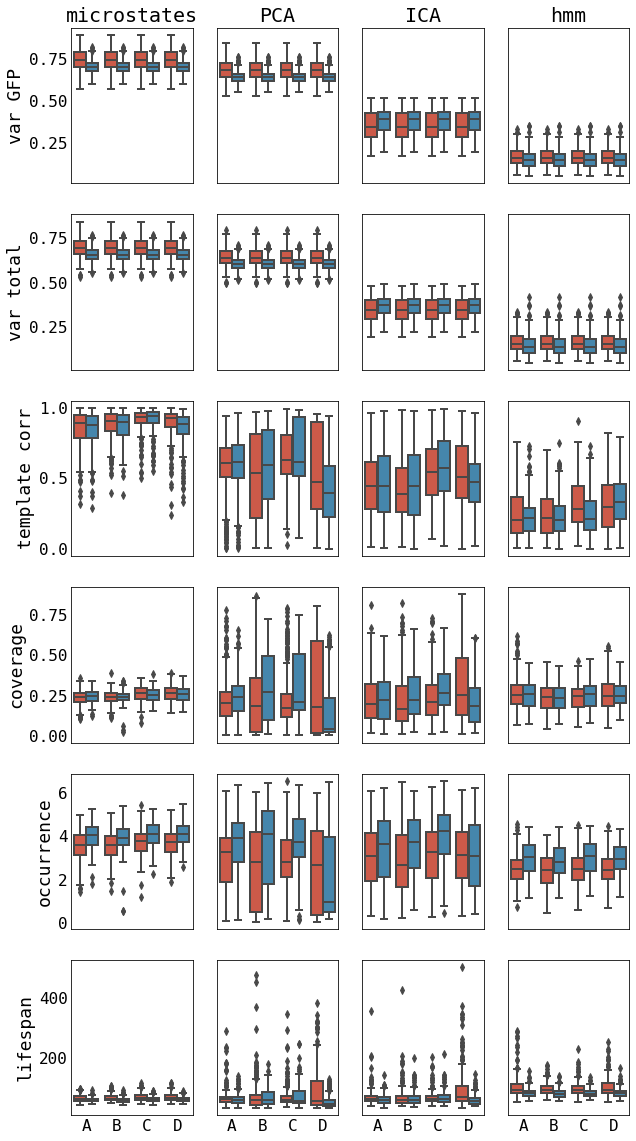

In [3]:
names = ["microstates", "PCA", "ICA", "hmm"]
ii = [0, 5, 10, 15]


_, axs = plt.subplots(
    nrows=len(VARS), ncols=len(names), figsize=(10, 20), sharex=True, sharey="row"
)
anovas = []
for j, var in enumerate(VARS):
    for i, name in zip(ii, names):
        df1 = all_dfs_EC[i]
        df1["data_type"] = "EC"
        df1["subject_id"] = df1["subject_id"].apply(lambda x: x.split("_")[0].strip())
        df2 = all_dfs_EO[i]
        df2["data_type"] = "EO"
        df2["subject_id"] = df2["subject_id"].apply(lambda x: x.split("_")[0].strip())
        df_tot = pd.concat([df1, df2], axis=0)
        # plot
        ax = sns.boxplot(
            data=df_tot,
            x="latent map",
            y=var,
            hue="data_type",
            ax=axs[j, i // 5],
        )
        ax.legend_.remove()
        ax.set_ylabel("")
        ax.set_xlabel("")
        if i == 0:
            ax.set_ylabel(var.replace("_", " "))
        if j == 0:
            ax.set_title(name)

        # rm ANOVA
        for ms in df_tot["latent map"].unique():
            anova = pg.rm_anova(
                data=df_tot[df_tot["latent map"] == ms],
                dv=var,
                within="data_type",
                subject="subject_id",
            )
            anova["latent map"] = ms
            anova["decomp type"] = name
            anova["variable"] = var
            anovas.append(anova)

In [4]:
anovas = pd.concat(anovas)

In [5]:
anovas["p-corr FDR"] = pg.multicomp(anovas["p-unc"].values, method="fdr_by")[1]
anovas["p-corr Holm"] = pg.multicomp(anovas["p-unc"].values, method="holm")[1]

In [6]:
anovas

,Source,ddof1,ddof2,F,p-unc,np2,eps,latent map,decomp type,variable,p-corr FDR,p-corr Holm
0,data_type,1,200,170.256314,1.478577e-28,0.459834,1.0,A,microstates,var_GFP,1.826372e-26,1.419433e-26
0,data_type,1,200,170.256314,1.478577e-28,0.459834,1.0,B,microstates,var_GFP,1.826372e-26,1.419433e-26
0,data_type,1,200,170.256314,1.478577e-28,0.459834,1.0,C,microstates,var_GFP,1.826372e-26,1.419433e-26
0,data_type,1,200,170.256314,1.478577e-28,0.459834,1.0,D,microstates,var_GFP,1.826372e-26,1.419433e-26
0,data_type,1,200,166.273787,4.387730e-28,0.453960,1.0,A,PCA,var_GFP,2.709913e-26,4.036711e-26
...,...,...,...,...,...,...,...,...,...,...,...,...
0,data_type,1,200,52.362821,9.660206e-12,0.207490,1.0,D,ICA,lifespan,1.403825e-10,6.085929e-10
0,data_type,1,200,74.009904,2.269157e-15,0.270099,1.0,A,hmm,lifespan,4.312178e-14,1.611102e-13
0,data_type,1,200,106.508440,2.724074e-20,0.347489,1.0,B,hmm,lifespan,6.409217e-19,2.070296e-18
0,data_type,1,200,110.408780,7.605635e-21,0.355688,1.0,C,hmm,lifespan,2.210507e-19,6.084508e-19
